## Importation des librairies

In [1]:
import pandas as pd 
import numpy as np


import matplotlib as plt
import matplotlib.pyplot as plt #Librairie matplotlib

import missingno as msno

from tqdm import tqdm
import copy as copy 

import seaborn as sns # Seaborn
from sklearn.preprocessing import LabelEncoder # Pour coder les variables
from sklearn.model_selection import train_test_split  # Pour partager les données en base d'apprentissages et de validation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



## Importation des données 

In [2]:
df = pd.read_csv(r"C:/Users/bahas/Desktop/IA2/bcw_data.csv", usecols=np.arange(1, 32))

In [3]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Dimennsion de la base de données
df.shape

(569, 31)

In [5]:
# Variables 
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#Type de données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<AxesSubplot:>

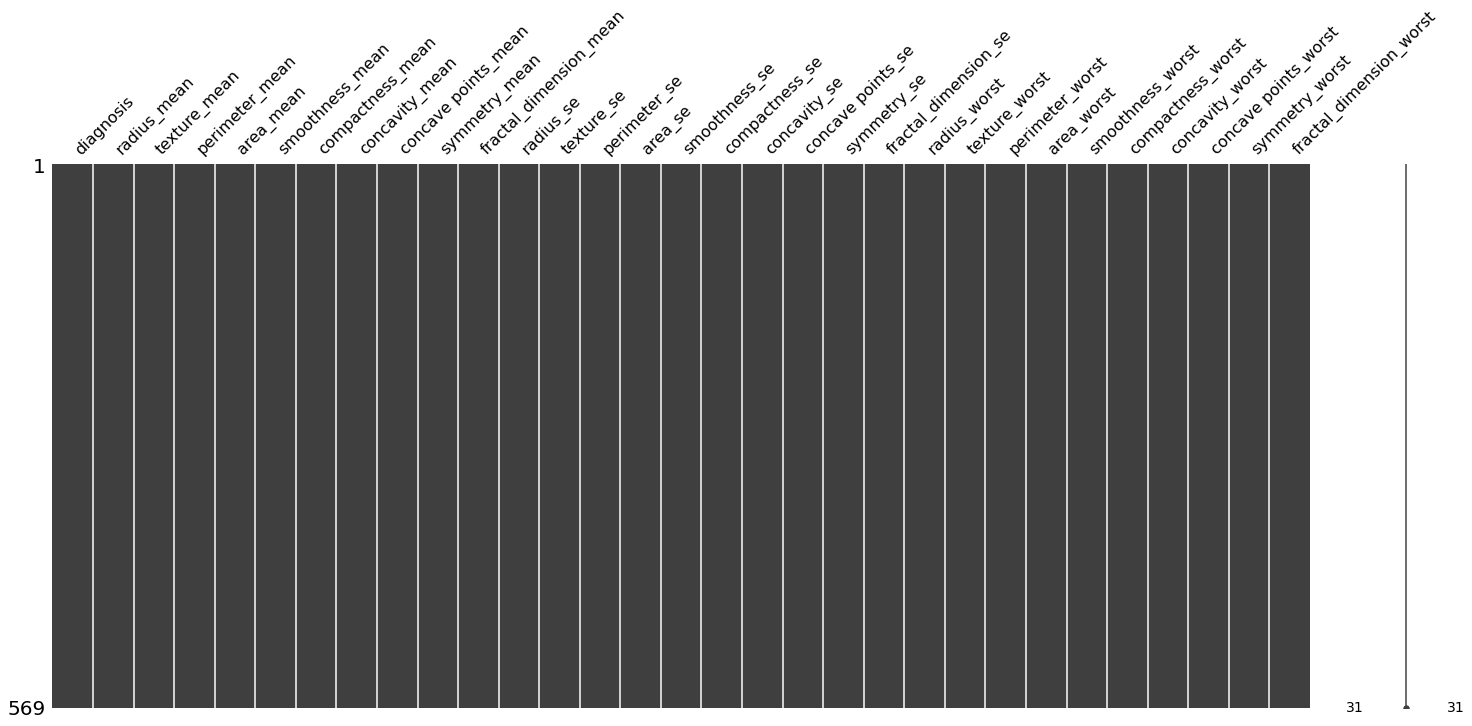

In [7]:
#Matrice des valeurs manquantes
msno.matrix(df)

In [8]:
# La statistique desciptives
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

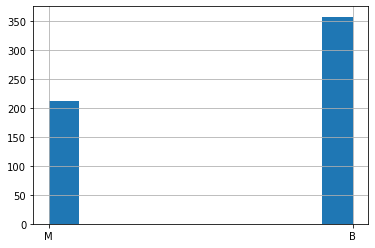

In [9]:
# Histogramme des la variables d'intérêt
df.diagnosis.hist()

<AxesSubplot:>

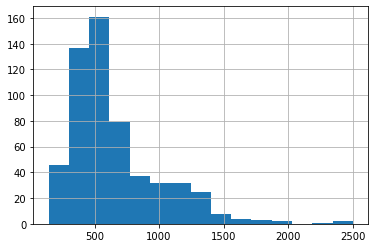

In [41]:
df["area_mean"].hist(bins=15)

In [11]:
# Codage des variables catégorielles 
encoder = LabelEncoder()

df["diagnosis"] = encoder.fit_transform(df["diagnosis"])

<AxesSubplot:>

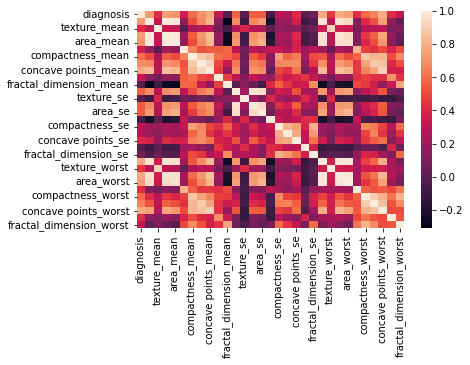

In [12]:
corr_mat=df.loc[:,~df.columns.isin(['id'])].corr()
sns.heatmap(corr_mat)

## Variables expliquatives et expliqué

In [13]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print('la dimension de X est : ', X.shape)
print ("la dimension de y est : ", y.shape)

la dimension de X est :  (569, 30)
la dimension de y est :  (569,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X)

## Perceptron Keras

In [15]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(30,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit the keras model on the dataset
model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
57/57 [==============================] - 0s 1ms/step - loss: 7.1583 - accuracy: 0.3585
Epoch 2/200
57/57 [==============================] - 0s 1ms/step - loss: 2.2769 - accuracy: 0.5518
Epoch 3/200
57/57 [==============================] - 0s 1ms/step - loss: 1.0320 - accuracy: 0.7206
Epoch 4/200
57/57 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.8120
Epoch 5/200
57/57 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8682
Epoch 6/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8629
Epoch 7/200
57/57 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8717
Epoch 8/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8805
Epoch 9/200
57/57 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.9016
Epoch 10/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8981
Epoch 11/

57/57 [==============================] - 0s 888us/step - loss: 0.1574 - accuracy: 0.9420
Epoch 162/200
57/57 [==============================] - 0s 877us/step - loss: 0.1443 - accuracy: 0.9385
Epoch 163/200
57/57 [==============================] - 0s 876us/step - loss: 0.1637 - accuracy: 0.9350
Epoch 164/200
57/57 [==============================] - 0s 877us/step - loss: 0.1136 - accuracy: 0.9508
Epoch 165/200
57/57 [==============================] - 0s 878us/step - loss: 0.2365 - accuracy: 0.9174
Epoch 166/200
57/57 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9455
Epoch 167/200
57/57 [==============================] - 0s 983us/step - loss: 0.3549 - accuracy: 0.8946
Epoch 168/200
57/57 [==============================] - 0s 842us/step - loss: 0.2402 - accuracy: 0.9297
Epoch 169/200
57/57 [==============================] - 0s 834us/step - loss: 0.2256 - accuracy: 0.9174
Epoch 170/200
57/57 [==============================] - 0s 853us/step - loss: 0.1259 - acc

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9455
Accuracy: 94.55


In [19]:
# make probability predictions with the model
y_pred = model.predict(X)

In [20]:
predictions1 = (y_pred > 0.5).astype(int)

In [21]:
print("count 0 = {}".format(np.count_nonzero(predictions1 == 0)))
print("count 1 = {}".format(np.count_nonzero(predictions1 == 1)))

count 0 = 388
count 1 = 181


<AxesSubplot:>

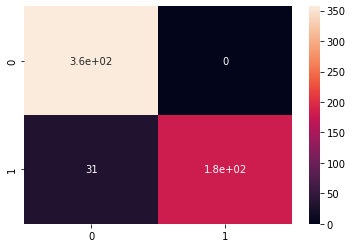

In [22]:
# Calcul de la matrice de confusion 
conf_matrix = tf.math.confusion_matrix(labels=y, predictions=predictions1)

# Représentation graphique de la matrice de confusion
sns.heatmap(conf_matrix, annot= True)

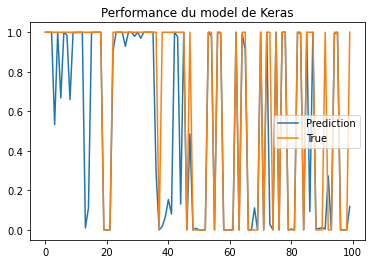

In [23]:
plt.title('Performance du model de Keras')

plt.plot(list(y_pred)[:100], label='Prediction')
plt.plot(list(y)[:100], label='True')
plt.legend()

## Perceptron Numpy

In [24]:
Y = np.array(df.pop("diagnosis"))
X = np.array(df)
print(X.shape, Y.shape)

(569, 30) (569,)


In [45]:
X = copy.deepcopy(X.T)
Y = copy.deepcopy(Y.reshape(-1,1).T)
print(X.shape, Y.shape)

(30, 569) (1, 569)


In [26]:
def layer_sizes(U, V, n_h=8):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = U.shape[0] # size of input layer
    n_h = n_h
    n_y = V.reshape(-1,1).T.shape[0] # size of output layer

    return (n_x, n_h, n_y)
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))


The size of the input layer is: n_x = 30
The size of the hidden layer is: n_h = 8
The size of the output layer is: n_y = 1


In [27]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(42) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [28]:
def sigmoid(U):
    z = 1/(1 + np.exp(-U))
    return z

In [29]:
def forward_propagation(U, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    ### END CODE HERE ###
    
    # Implement Forward Propagation
    Z1 = np.dot(W1,U) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, U.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [30]:
def compute_cost(A2, V):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = V.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.dot(V,np.log(A2).T) + np.dot((1-V),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [31]:
def backward_propagation(parameters, cache, U, V):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = U.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']

    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - V
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, U.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [32]:
def update_parameters(parameters, grads, learning_rate = 0.3):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [33]:
def nn_model(U, V, n_h, num_iterations = 200, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(42)
    n_x, n_h, n_y = layer_sizes(U, V, n_h=n_h)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(U, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, V)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, U, V)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 0.2)

        # Print the cost every 100 iterations
        if print_cost and i % 32 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [34]:
def predict(parameters, U):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(U, parameters)
    threshold = 0.5 
    predictions = (A2 >= 0.5).astype(int)#(A2 > threshold)
    
    return predictions

In [35]:
parameters = nn_model(X, Y, n_h = 8, num_iterations = 200, print_cost=True)

Cost after iteration 0: 0.692942
Cost after iteration 32: 0.660318
Cost after iteration 64: 0.660317
Cost after iteration 96: 0.660317
Cost after iteration 128: 0.660317
Cost after iteration 160: 0.660317
Cost after iteration 192: 0.660317


In [36]:
y_predL = predict(parameters, X)
y_predL

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [53]:
parameters

{'W1': array([[ 8.75649355e-03,  4.28155991e-03,  3.07566464e-02,
          1.52443429e-01, -2.31157070e-03, -2.31688787e-03,
          1.58043329e-02,  7.68133508e-03, -4.63827227e-03,
          5.44617184e-03, -4.55145472e-03, -4.26297854e-03,
          2.99886408e-03, -1.33398840e-02, -1.72467946e-02,
         -5.61628553e-03, -1.01206322e-02,  3.14547771e-03,
         -9.07341469e-03, -1.41218776e-02,  1.87872869e-02,
          5.12438064e-03,  2.74027005e-02,  1.48083385e-01,
         -5.40348486e-03,  1.16308098e-03, -1.14643936e-02,
          3.77817261e-03, -5.91946245e-03, -2.89130987e-03],
        [-6.24556809e-03,  1.80357640e-02, -1.59373921e-03,
         -1.77309144e-02,  8.22292468e-03, -1.22107924e-02,
          2.08730531e-03, -1.95971949e-02, -1.32867350e-02,
          1.96674942e-03,  7.37620703e-03,  1.67676832e-03,
         -1.21419028e-03, -3.61354090e-03, -1.47854975e-02,
         -7.19910170e-03, -4.60712436e-03,  1.05710575e-02,
          3.43553024e-03, -1.7630

In [51]:
print ('Accuracy: %d' % float((np.dot(Y,y_predL.T) + np.dot(1-Y,1-y_predL.T))/float(Y.size)*100) + '%')

Accuracy: 62%


In [183]:
#predictions = (predictions > 0.5).astype(int)

In [184]:
print("count 0 = {}".format(np.count_nonzero(predict == 0)))
print("count 1 = {}".format(np.count_nonzero(predict == 1)))

count 0 = 569
count 1 = 0


<AxesSubplot:>

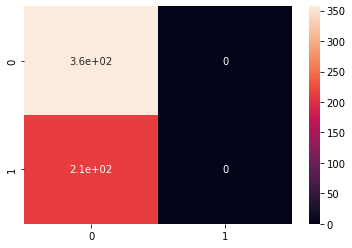

In [142]:
# Calcul de la matrice de confusion 
conf_matrix = tf.math.confusion_matrix(labels=y, predictions=predictions.T)

# Représentation graphique de la matrice de confusion
sns.heatmap(conf_matrix, annot= True)

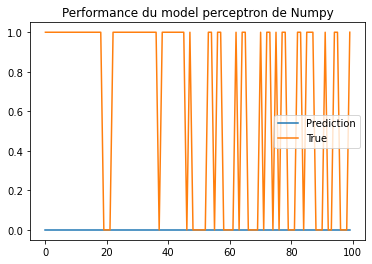

In [143]:
plt.title('Performance du model perceptron de Numpy')

plt.plot(list(predictions.T)[:100], label='Prediction')
plt.plot(list(y)[:100], label='True')
plt.legend()